In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
trending_data = pd.read_csv('../data/US_youtube_trending_data.csv')
channel_data = pd.read_csv('../data/channels.csv')

In [3]:
df_merge = pd.merge(trending_data, channel_data, left_on='channelId', right_on='channel_id')
df = df_merge.drop_duplicates(subset='video_id', keep='first')
df = df.reset_index(drop=True)
df = df.rename(columns={'title_x': 'video_title', 'title_y': 'channel_title', 'description_x': 'video_description', 'description_y': 'channel_description'})
df = df.drop(['video_id', 'channelId', 'thumbnail_link', 'category_id', 'categoryId', 'channel_id', 'picture_url', 'profile_url', 'trailer_url', 'location'], axis=1)

In [4]:
print(df.shape)
print(df.dtypes) 

(18069, 20)
video_title            object
publishedAt            object
channelTitle           object
trending_date          object
tags                   object
view_count              int64
likes                   int64
dislikes                int64
comment_count           int64
comments_disabled        bool
ratings_disabled         bool
video_description      object
category_name          object
country                object
channel_description    object
followers               int64
join_date              object
channel_title          object
trailer_title          object
videos                  int64
dtype: object


In [5]:
print(df['likes'].describe())

count    1.806900e+04
mean     7.457772e+04
std      1.628731e+05
min      0.000000e+00
25%      1.474200e+04
50%      3.166900e+04
75%      7.258100e+04
max      4.090138e+06
Name: likes, dtype: float64


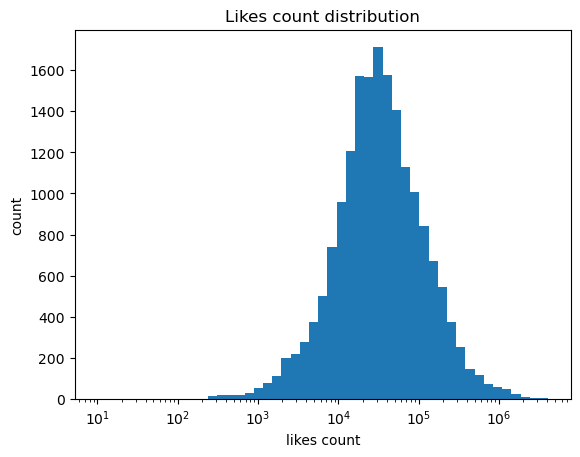

In [6]:
df['likes'].plot.hist(bins=np.logspace(1,np.log10(np.max(df['likes'])),50)) 
plt.semilogx()
plt.xlabel('likes count')
plt.ylabel('count')
plt.title("Likes count distribution")
plt.savefig("../figures/likes count.jpg", bbox_inches='tight')
plt.show()

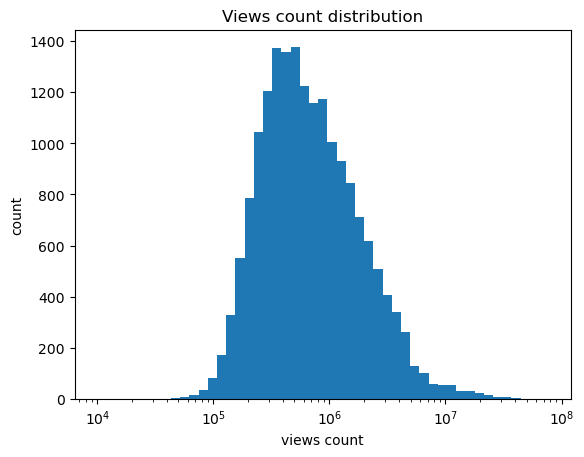

In [7]:
df['view_count'].plot.hist(bins=np.logspace(4,np.log10(np.max(df['view_count'])),50)) 
plt.semilogx()
plt.xlabel('views count')
plt.ylabel('count')
plt.title("Views count distribution")
plt.savefig("../figures/views count.jpg", bbox_inches='tight')
plt.show()

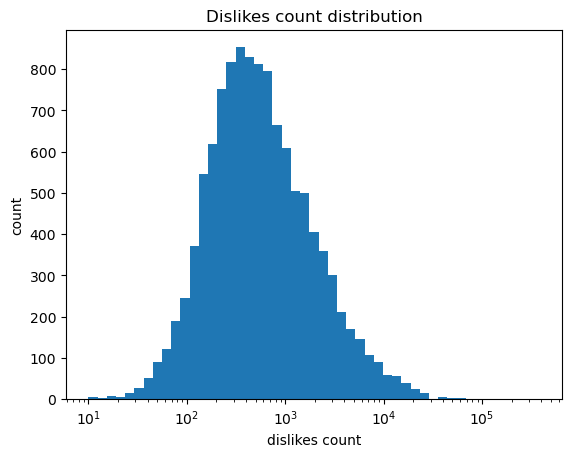

In [8]:
df['dislikes'].plot.hist(bins=np.logspace(1,np.log10(np.max(df['dislikes'])),50)) 
plt.semilogx()
plt.xlabel('dislikes count')
plt.ylabel('count')
plt.title("Dislikes count distribution")
plt.savefig("../figures/dislikes count.jpg", bbox_inches='tight')
plt.show()

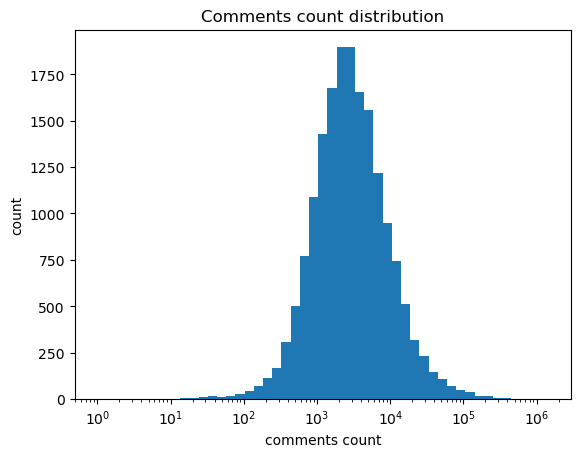

In [9]:
df['comment_count'].plot.hist(bins=np.logspace(np.log10(1),np.log10(np.max(df['comment_count'])),50)) 
plt.semilogx()
plt.xlabel('comments count')
plt.ylabel('count')
plt.title("Comments count distribution")
plt.savefig("../figures/comments count.jpg", bbox_inches='tight')
plt.show()

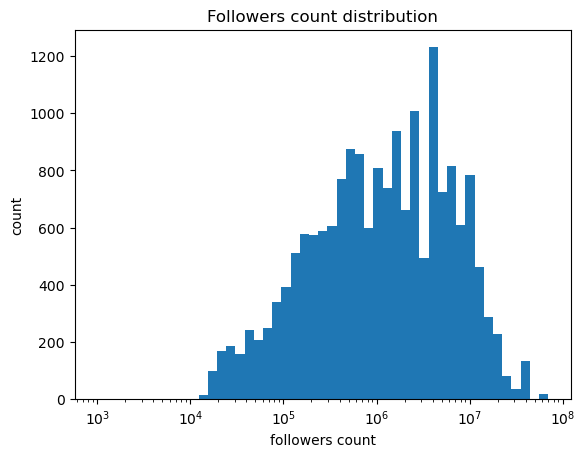

In [10]:
df['followers'].plot.hist(bins=np.logspace(3,np.log10(np.max(df['followers'])),50)) 
plt.semilogx()
plt.xlabel('followers count')
plt.ylabel('count')
plt.title("Followers count distribution")
plt.savefig("../figures/followers count.jpg", bbox_inches='tight')
plt.show()

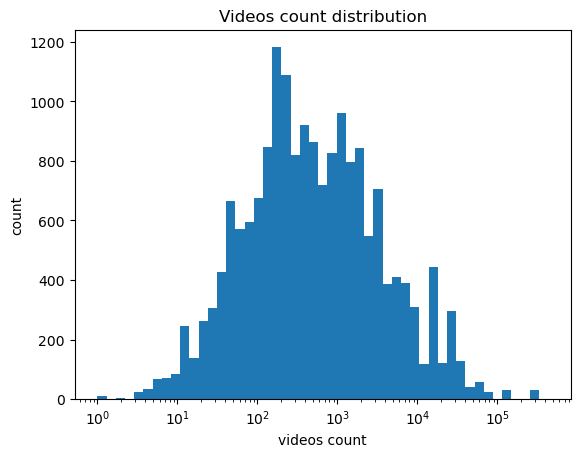

In [11]:
df['videos'].plot.hist(bins=np.logspace(np.log10(1),np.log10(np.max(df['videos'])),50)) 
plt.semilogx()
plt.xlabel('videos count')
plt.ylabel('count')
plt.title("Videos count distribution")
plt.savefig("../figures/videos count.jpg", bbox_inches='tight')
plt.show()

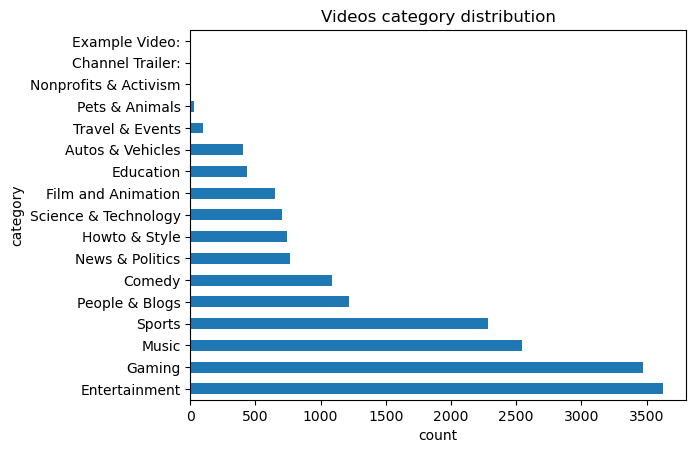

In [12]:
pd.value_counts(df['category_name']).plot.barh()
plt.xlabel('count')
plt.ylabel('category')
plt.title("Videos category distribution")
plt.savefig("../figures/category.jpg", bbox_inches='tight')
plt.show()

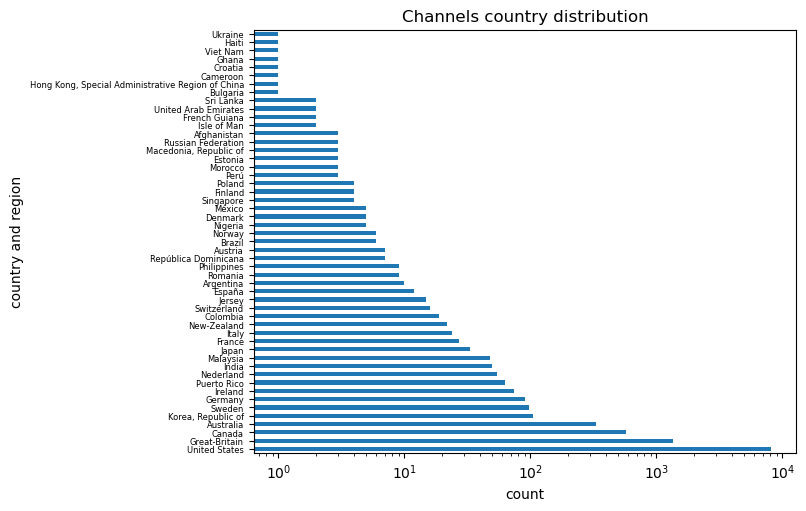

In [13]:
plt.figure(figsize=(7,5.5))
pd.value_counts(df['country']).plot.barh()
plt.semilogx()
plt.yticks(fontsize=6)
plt.xlabel('count')
plt.ylabel('country and region')
plt.title("Channels country distribution")
plt.savefig("../figures/country.jpg", bbox_inches='tight')
plt.show()

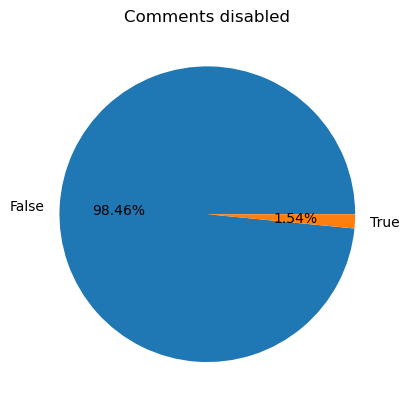

In [14]:
plt.pie([sum(1-df['comments_disabled']), sum(df['comments_disabled'])], labels=df['comments_disabled'].unique(), autopct='%.2f%%')
plt.title("Comments disabled")
plt.savefig("../figures/comments disabled.jpg", bbox_inches='tight')
plt.show()

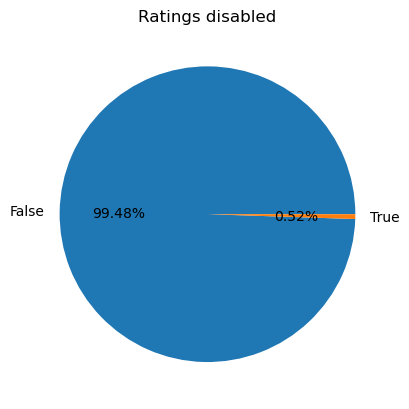

In [15]:
plt.pie([sum(1-df['ratings_disabled']), sum(df['ratings_disabled'])], labels=df['ratings_disabled'].unique(), autopct='%.2f%%')
plt.title("Ratings disabled")
plt.savefig("../figures/ratings disabled.jpg", bbox_inches='tight')
plt.show()

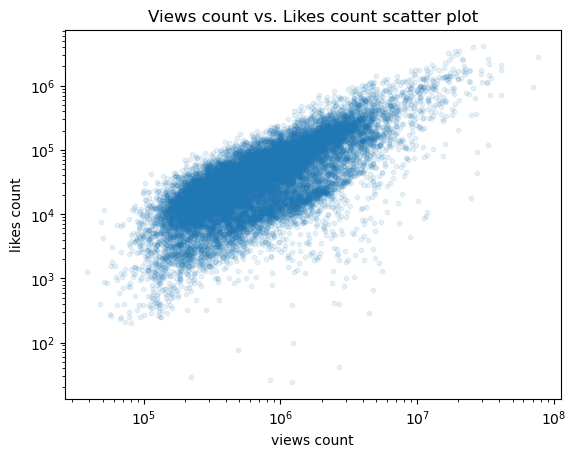

In [16]:
df.plot.scatter('view_count','likes',s=10,alpha=0.1)
plt.semilogx()
plt.semilogy()
plt.xlabel('views count')
plt.ylabel('likes count')
plt.title("Views count vs. Likes count scatter plot")
plt.savefig("../figures/views vs likes.jpg", bbox_inches='tight')
plt.show()

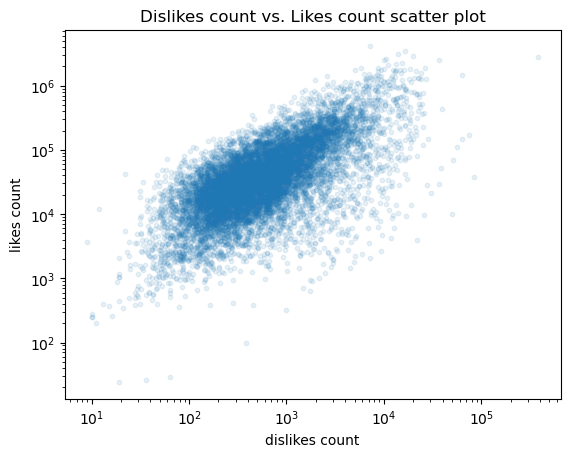

In [17]:
df.plot.scatter('dislikes','likes',s=10,alpha=0.1)
plt.semilogx()
plt.semilogy()
plt.xlabel('dislikes count')
plt.ylabel('likes count')
plt.title("Dislikes count vs. Likes count scatter plot")
plt.savefig("../figures/dislikes vs likes.jpg", bbox_inches='tight')
plt.show()

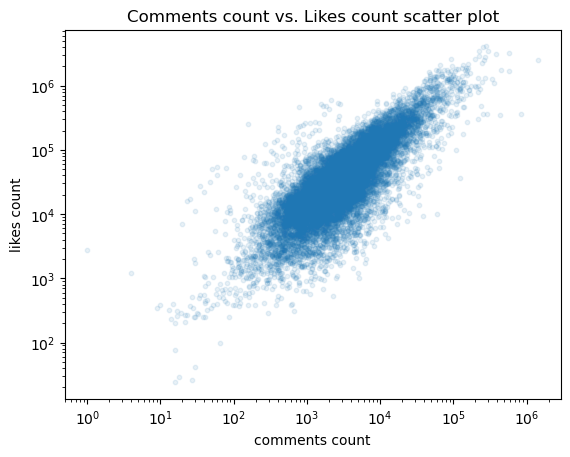

In [18]:
df.plot.scatter('comment_count','likes',s=10,alpha=0.1)
plt.semilogx()
plt.semilogy()
plt.xlabel('comments count')
plt.ylabel('likes count')
plt.title("Comments count vs. Likes count scatter plot")
plt.savefig("../figures/comments vs likes.jpg", bbox_inches='tight')
plt.show()

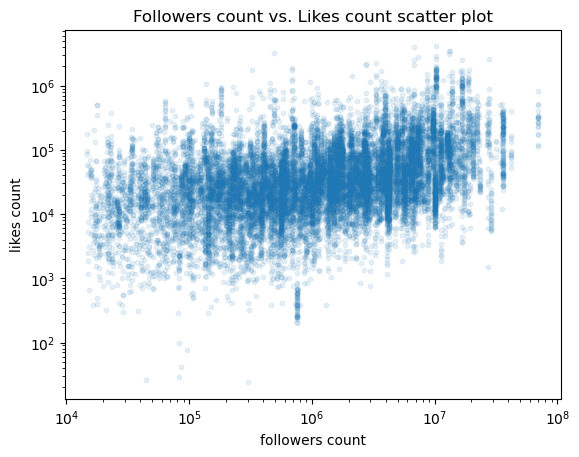

In [19]:
df.plot.scatter('followers','likes',s=10,alpha=0.1)
plt.semilogx()
plt.semilogy()
plt.xlabel('followers count')
plt.ylabel('likes count')
plt.title("Followers count vs. Likes count scatter plot")
plt.savefig("../figures/followers vs likes.jpg", bbox_inches='tight')
plt.show()

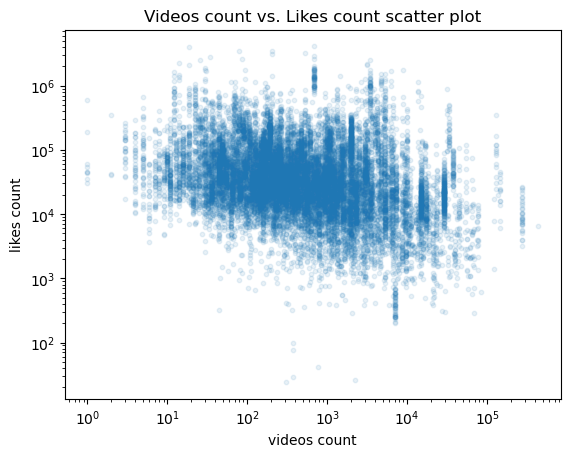

In [20]:
df.plot.scatter('videos','likes',s=10,alpha=0.1)
plt.semilogx()
plt.semilogy()
plt.xlabel('videos count')
plt.ylabel('likes count')
plt.title("Videos count vs. Likes count scatter plot")
plt.savefig("../figures/videos vs likes.jpg", bbox_inches='tight')
plt.show()

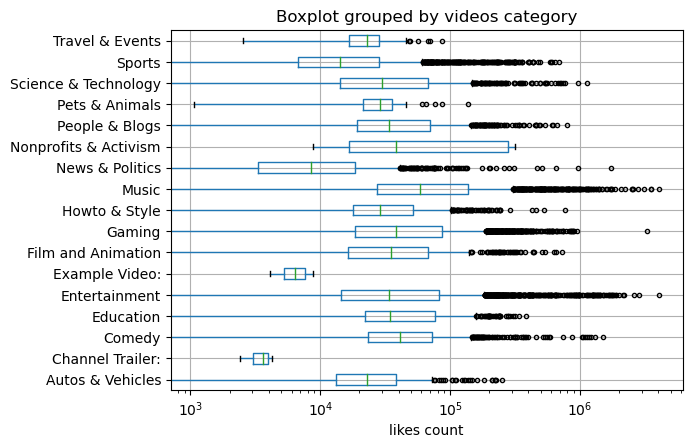

In [21]:
df[['likes','category_name']].boxplot(by='category_name', vert=False, sym='.')
plt.xlabel('likes count')
plt.semilogx()
plt.title("Boxplot grouped by videos category")
plt.suptitle("")
plt.savefig("../figures/category boxplot.jpg", bbox_inches='tight')
plt.show()

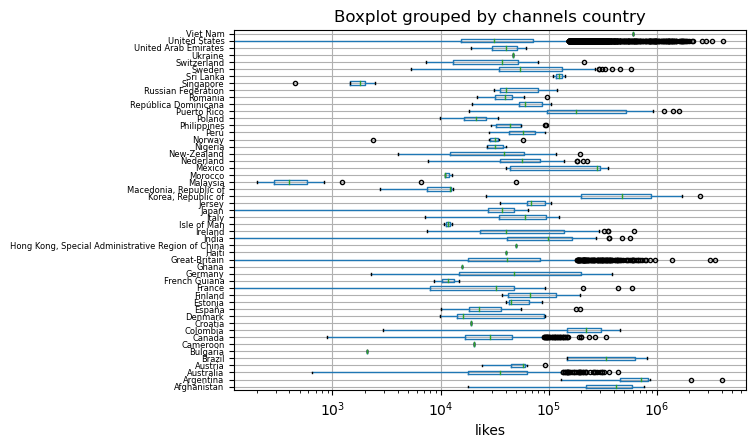

In [22]:
df[['likes','country']].boxplot(by='country', vert=False, sym='.')
plt.xlabel('likes')
plt.yticks(fontsize=6)
plt.semilogx()
plt.title("Boxplot grouped by channels country")
plt.suptitle("")
plt.savefig("../figures/country boxplot.jpg", bbox_inches='tight')
plt.show()

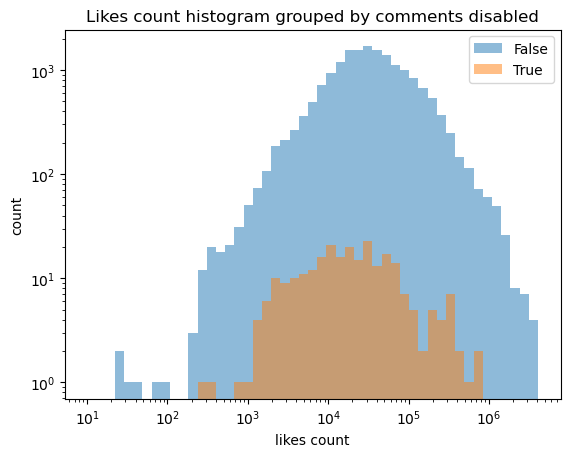

In [23]:
for c in df['comments_disabled'].unique():
    plt.hist(df[df['comments_disabled']==c]['likes'], alpha=0.5, label=c, bins=np.logspace(1,np.log10(np.max(df['likes'])),50), log=True)
plt.title("Likes count histogram grouped by comments disabled")
plt.legend()
plt.semilogx()
plt.ylabel('count')
plt.xlabel('likes count')
plt.suptitle("")
plt.savefig("../figures/comments disabled hist.jpg", bbox_inches='tight')
plt.show()

# Split Data

In [24]:
y = df['likes']
X = df.drop(columns='likes')

In [25]:
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, stratify=X['comments_disabled'], random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=0.5, stratify=X_other['comments_disabled'], random_state=random_state)

# Preprocessing

In [26]:
onehot_ftrs = ['category_name', 'country']
std_ftrs = ['view_count', 'dislikes', 'comment_count', 'followers', 'videos']
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), onehot_ftrs), ('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
X['publishedAt'] = pd.to_datetime(X['publishedAt'])
X['trending_date'] = pd.to_datetime(X['trending_date'])
X['join_date'] = pd.to_datetime(X['join_date'])
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)